# Machine Learning I - Practical I

Name: Levin Wiebelt, Mahdi Enayati, Sharmita Dey

Course: Machine Learning

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 practicals to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

In [3]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [4]:
data = pd.read_csv('data/superconduct_train.csv')
print(data.shape)

(21263, 82)


In [5]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed.

In [6]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set

In [7]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatterplots** relating the target variable to one of the feature values. For this you will need 81 scatterplots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero mean and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

Length Data: 20763
Number of bins: 207.63


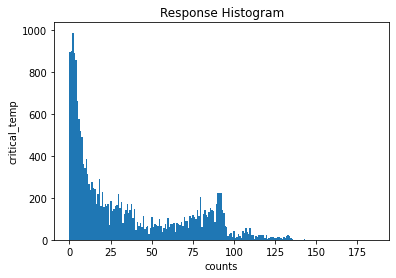

In [8]:
# Histogram of the target variable

nr_bins = len(y_train_full)/100
print(
    'Length Data: ' + str(len(y_train_full)) +
    '\nNumber of bins: ' + str(nr_bins)
)

plt.hist(
    x = y_train_full,
    bins =  round(nr_bins),
    histtype = 'stepfilled'
)

plt.title('Response Histogram')
plt.xlabel('counts')
plt.ylabel(target_clm)
plt.show()

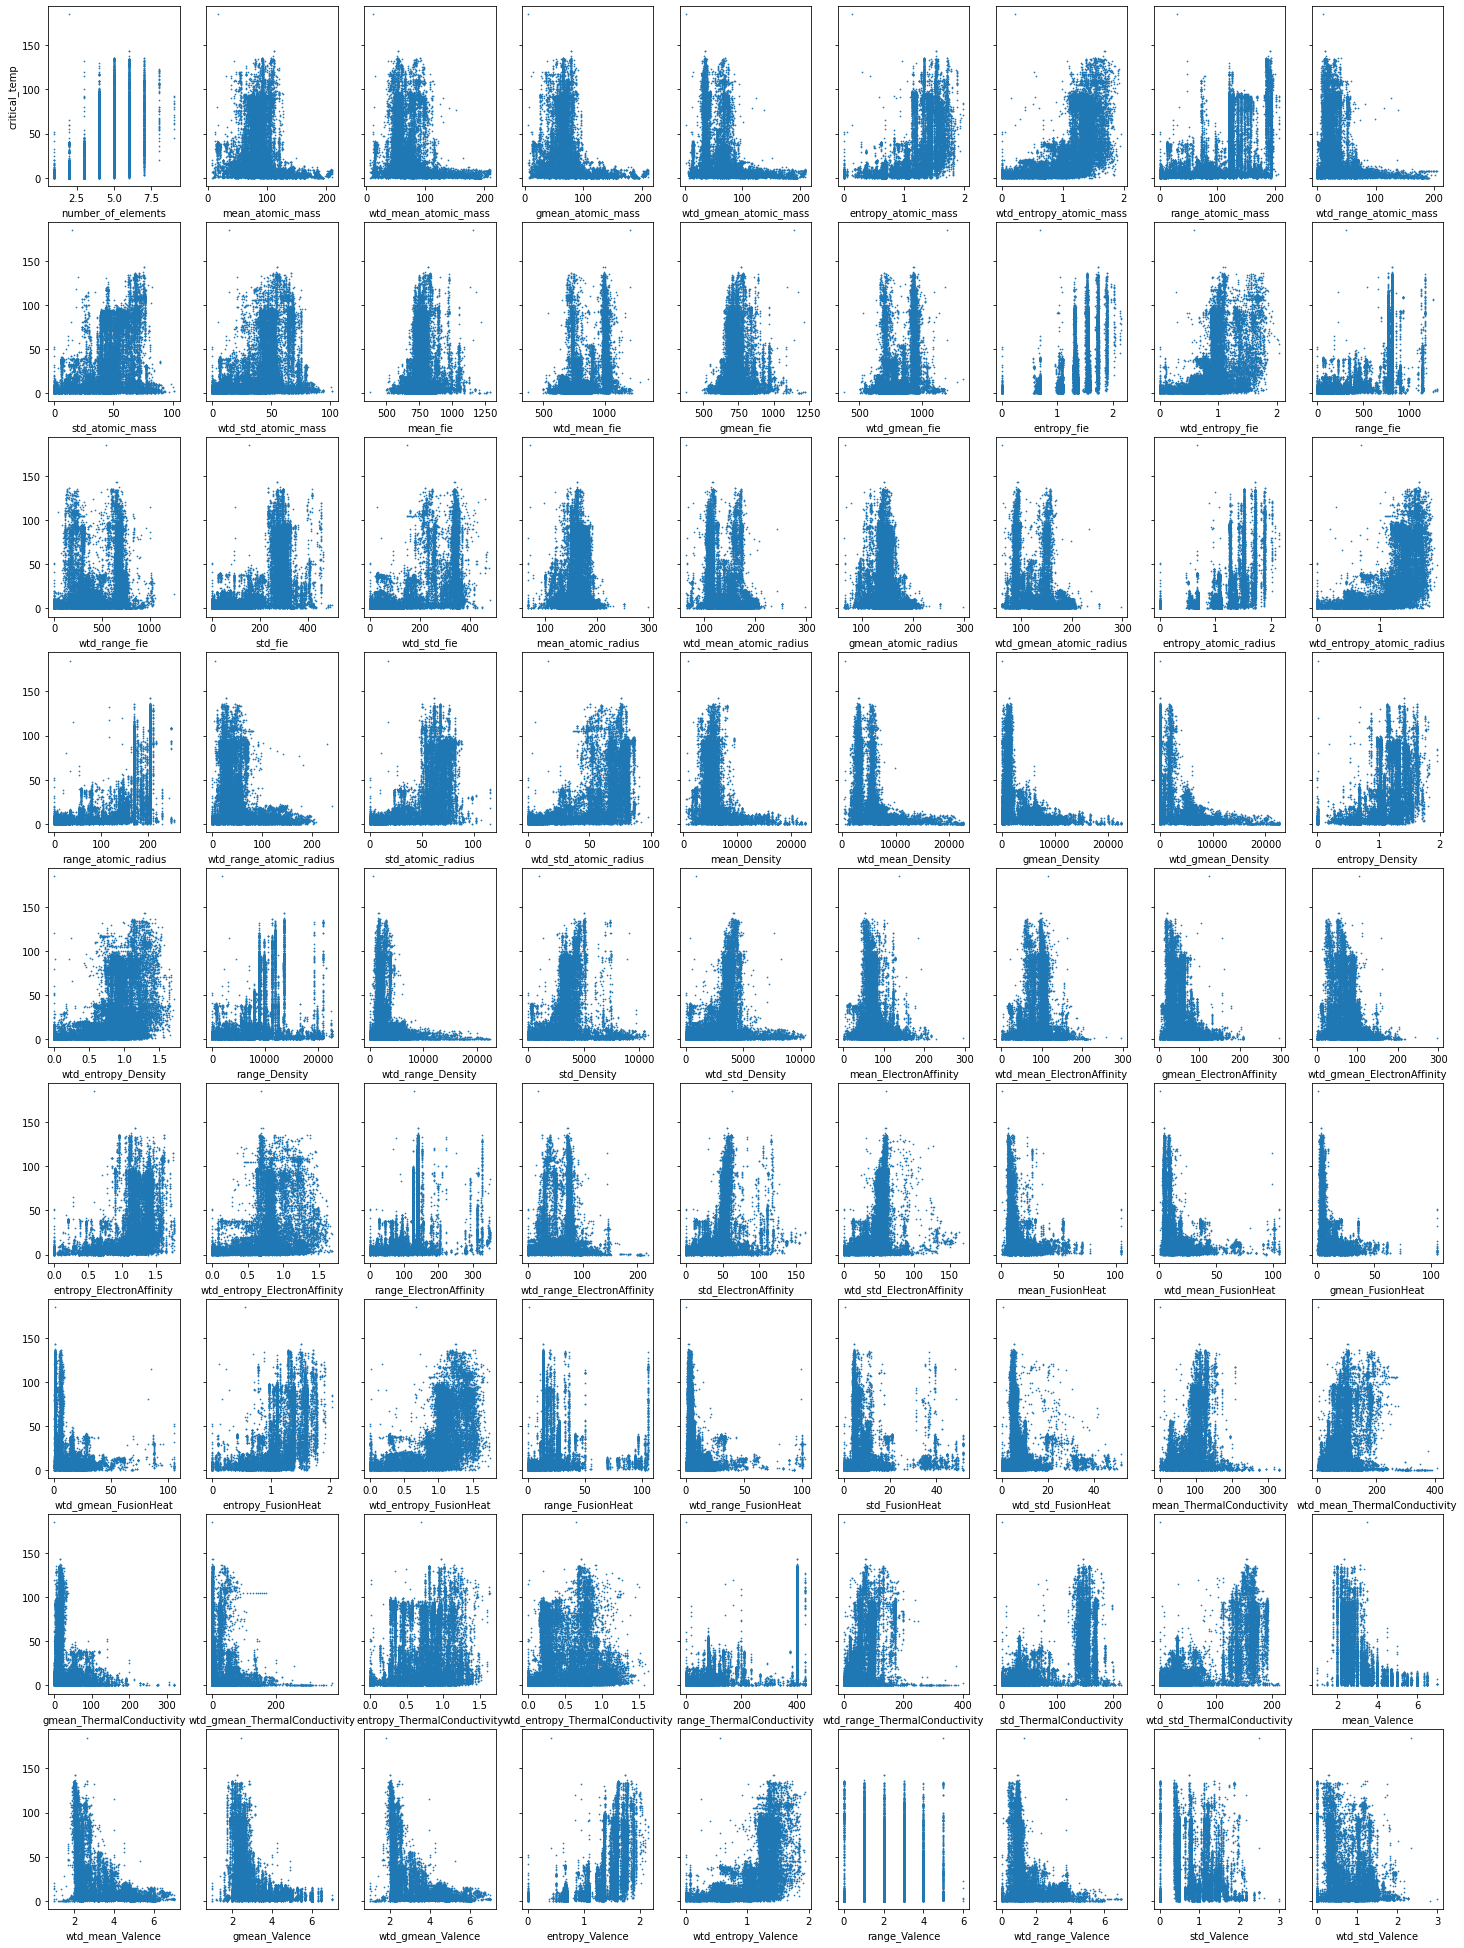

In [9]:
# Scatter plots of the target variable vs. features

fig, ax = plt.subplots(9, 9, figsize=(25, 35), sharey = True)
#fig.supylabel(target_clm)
#fig.suptitle('Response vs. Features')
ax[0,0].set_ylabel(target_clm)

for i in range(9):
    for j in range(9):
        ax[i,j].scatter(
            x = X_train_full[:, 9*i+j], 
            y = y_train_full,
            s = .5
        )
        ax[i,j].set_xlabel(data.columns[9*i+j])

#plt.show()

In [10]:
# Normalize array

def normalize_arr(arr):
    new_array = np.copy(arr)
    nr_cols = arr.shape[1]
    for col in range(nr_cols):
        current_col = arr[:, col] 
        m, sd = arr[:, col].mean(), arr[:, col].std()
        new_array[:, col] = (current_col - m) / sd
        
    return new_array

X_train_norm = normalize_arr(X_train)
y_train_norm = normalize_arr(y_train)
X_test_norm = normalize_arr(X_test)
y_test_norm = normalize_arr(y_test)
X_train_full_norm = normalize_arr(X_train_full)
y_train_full_norm = normalize_arr(y_train_full)


print('Check Means before normalization:')
print([round(X_train[:, i].std(),3) for i in range(5)])
print('\nCheck SDs before normalization:')
print([round(X_train[:, i].mean(), 3) for i in range(5)])

print('\nCheck Means after normalization:')
print([round(X_train_norm[:, i].std(),3) for i in range(5)])
print('\nCheck SDs after normalization:')
print([round(X_train_norm[:, i].mean(), 3) for i in range(5)])

Check Means before normalization:
[1.51, 29.242, 31.444, 30.726, 34.877]

Check SDs before normalization:
[4.185, 87.716, 73.212, 71.151, 58.439]

Check Means after normalization:
[1.0, 1.0, 1.0, 1.0, 1.0]

Check SDs after normalization:
[0.0, -0.0, -0.0, -0.0, 0.0]


Which material properties may be useful for predicting superconductivity? What other observations can you make?

**Answers**
* There does not seem to be any approximately linear realtionship between response and features
* Quadratic relationships are indicated for many features, e.g. wtd_atomic_radius
* Some plots display a bimodal conditional response distribution, which may be hard to model
* Some predictors may be highly correlated, since the conditional response distributions are very similar (also naming is similar)


## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [11]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  2640.432578444892
r^2:  -1.108062856115481


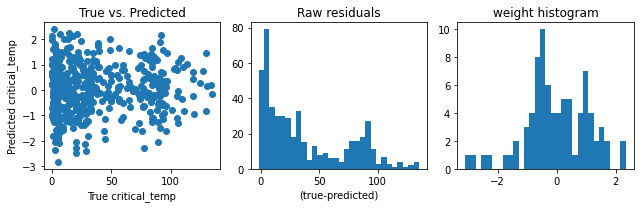

In [12]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_test = np.random.randn(y_test.size)

plot_regression_results(y_test, y_pred_test, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regession result, you should get mean squared error of 707.8.

In [13]:
def OLS_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    
    from numpy import ones
    from numpy.linalg import inv
    from numpy import matmul
    from numpy import transpose
    from numpy import hstack
    
    # build design matrix X_ready
    X_ready = hstack((np.ones((X_train.shape[0],1)),X_train))
    
    # calculate OLS-estimates 'weights'
    XX_inv = inv(matmul(transpose(X_ready), X_ready))
    XX_inv_X = matmul(XX_inv, transpose(X_ready))
    weights = matmul(XX_inv_X, y_train)
    
    # predict response values for test set X_test
    # first attach column of ones
    X_test = hstack((np.ones((X_test.shape[0],1)),X_test))
    y_pred = matmul(X_test, weights)
    
    # ---------------- END CODE -------------------------

    return weights, y_pred

In [14]:
weights, y_pred = OLS_regression(X_test, X_train, y_train)

MSE:  599.739762495521
r^2:  0.5211810644311383


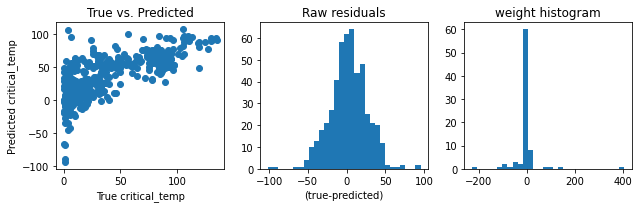

In [15]:
# Plots of the results
plot_regression_results(y_test, y_pred, weights)

What do you observe? Is the linear regression model good?

* The residual distribution looks approximately normal.
* However, many estimator are close to zero, as shown in the weight histogram
* Prediction error variance is high for low resposne-values
* The R² value is at .41, which is unacceptably low for relationships in the physical world

## Task 3: Compare your implementation to sklearn

Now, familarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [16]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    from sklearn.linear_model import LinearRegression
    
    reg = LinearRegression().fit(X_train, y_train)
    weights = reg.coef_
    y_pred = reg.predict(X_test)
    
    # ---------------- END CODE -------------------------

    return weights, y_pred

MSE:  599.7397626167958
r^2:  0.5211810643343151


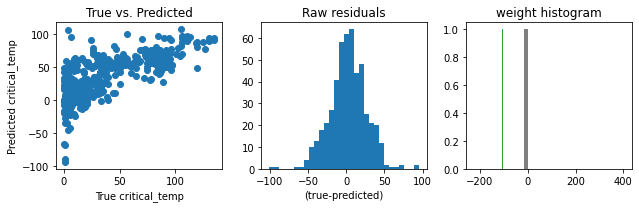

In [17]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 707.8.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

MSE:  329.8607010412186
r^2:  0.7366465263177637


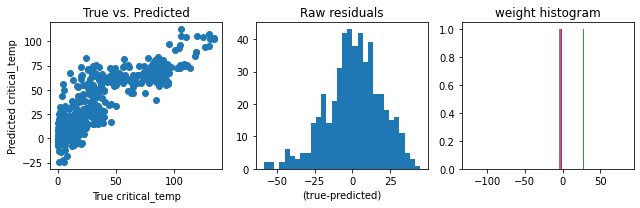

In [18]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

* The model fit is better, indicated by R² (and MSE)
* Variance of predictions is lowered (look at scale of y-axis!)
* Difference in prediction error is more less present if normalized data is used

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [19]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    from numpy import ones
    from numpy.linalg import inv
    from numpy import matmul
    from numpy import transpose
    from numpy import hstack
    from numpy import identity
    
    X_train = hstack((ones((len(X_train),1)), X_train))
    XX = matmul(transpose(X_train), X_train)
    penalty = alpha * identity(len(XX))
    XX_inv_pen = inv(XX+penalty)
    Xy = matmul(transpose(X_train), y_train)
    weights = matmul(XX_inv_pen, Xy)
    
    X_test = hstack((ones((len(X_test),1)), X_test))
    y_pred = matmul(X_test, weights)


    # ---------------- END CODE -------------------------

    return weights, y_pred

Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

MSE:  429.7378501025888
r^2:  0.6569068238804503


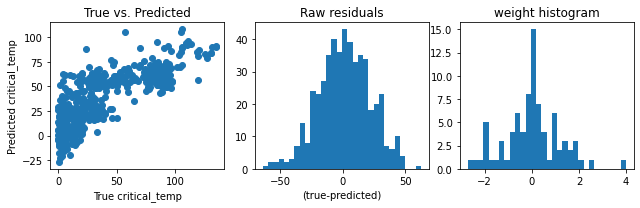

In [20]:
# Run ridge regression with alpha=10
weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha = 10)

# Plot regression results
plot_regression_results(y_test, y_pred, weights)

Now test a range of log-spaced $\alpha$s (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [21]:
alphas = np.logspace(-7, 7, 100)

# ---------------- INSERT CODE ----------------------

weights_list = [ridge_regression(X_test, X_train, y_train, alpha = i)[0] for i in alphas]
predictions_list = [ridge_regression(X_test, X_train, y_train, alpha = i)[1] for i in alphas]
mse_list = [mean_squared_error(y_test, j) for j in predictions_list]

# weight_list stores all weights for one specific alpha as list entries.
# What we need for plotting is to store one specific weight for all alphas in one list entry.

nr_weights = len(weights_list[1])
coef_list = [np.array([k[i] for k in weights_list]) for i in range(nr_weights)]

# ---------------- END CODE -------------------------

Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

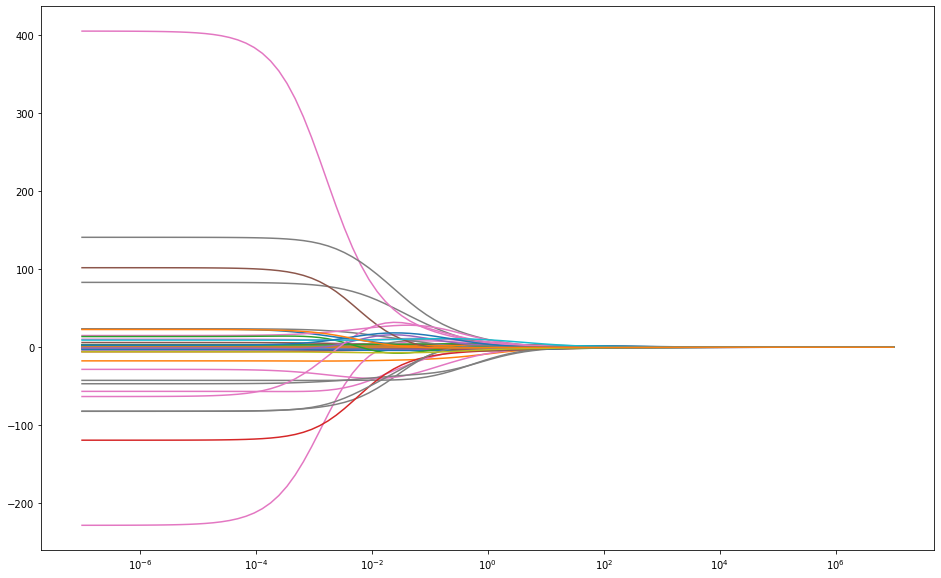

In [22]:
# Plot of coefficients vs. alphas
plt.figure(figsize = (16,10))
for i in range(len(coef_list)):
        plt.plot(alphas, coef_list[i])
plt.xscale('log')

Why are the values of the weights largest on the left? Do they all change monotonically? 

ANSWER: Being on the left of the x-axis means having a low alpha-penalty in ridge-regression. For higher penalties some weights are shrunken to zero, and for large enough penalties eventually all.

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$s should be close to the test-set MSE of the unregularized solution, i.e. 708.

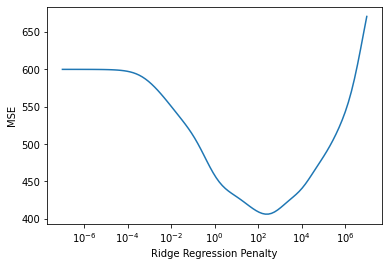

In [23]:
# Plot of MSE  vs. alphas
plt.plot(alphas,mse_list)
plt.xscale('log')
plt.xlabel('Ridge Regression Penalty')
plt.ylabel('MSE')
plt.show()

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~700 on the left?

An optimal alphe in the sense of minimum-MSE is slightly above 10² with an MSE of around 415. It is hence better than the unregularized model with MSE of 600. The unregularized model is the special case of ridge regression with alpha = 0 and can be seen on the far left of the graph.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [24]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------

    weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha)

    # ---------------- END CODE -------------------------

    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

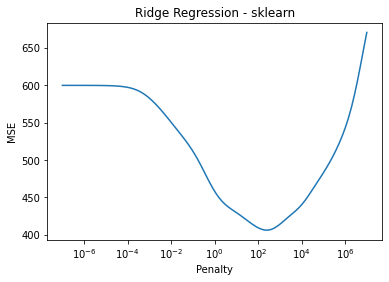

In [25]:
# Plot of MSE  vs. alphas
y_pred_list = [ridge_regression_sklearn(X_test, X_train, y_train, i)[1] for i in alphas]
mse_list = [mean_squared_error(y_test, i) for i in y_pred_list]
plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('Penalty')
plt.ylabel('MSE')
plt.title('Ridge Regression - sklearn')
plt.show()

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [26]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    # ---------------- INSERT CODE ----------------------
    # np.split raises errors if equal split is not possible
    from numpy import array_split
    from numpy import hstack
    from numpy import concatenate
    
    for i in range(n_folds):
        
        # Split the training data (features) into folds
        X_split_list = array_split(X, n_folds, axis=0)
        #splitting along first axis corresponds to horizontal split (split by observations)        
        #the list-method pop yields the element at the requested index AND more importantly removes
        #this element from the list.
        X_validate = X_split_list.pop(i) #removes split i from list
        X_train = concatenate((X_split_list), axis = 0) #makes an array out of the remaining splits
    
        # Split the training data (target) into folds
        y_split_list = array_split(y, n_folds, axis=0)
        y_validate = y_split_list.pop(i)
        y_train = concatenate((y_split_list), axis = 0)
        
        # calculate one mse per penalty parameter alpha
        for j in range(len(alphas)):
            y_pred = ridge_regression(X_validate, X_train, y_train, alphas[j])[1]
            mse = mean_squared_error(y_validate, y_pred)
            cv_results_mse[i, j] = mse
            

    # ---------------- END CODE -------------------------

    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [27]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=np.logspace(-7, 7, 100))

We plot the MSE trace for each fold separately:

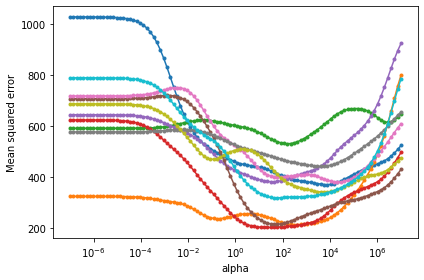

In [28]:
Oyeplt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

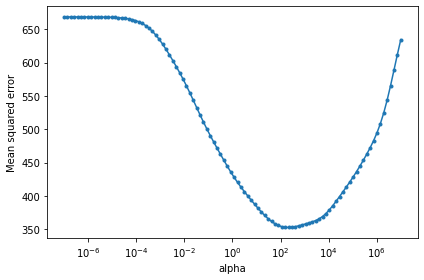

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

YOUR ANSWER HERE

The optimal alpha is very much the same as the one found with the test set (slightly above 10²). However, MSE varies substantially. For unpenalized ridge regression it is at ~675, which is higher than on the test.set approach. At the optimum penalty it is, in turn, substantially below the test-set MSE. I conclude that CV tends to estimate the test-MSE with bias, however it is sensitive in finding the true optimal penalty.

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [30]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)

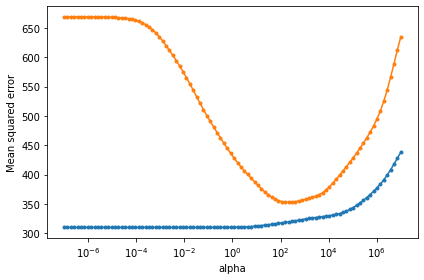

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We zoom in on the blue curve to the very left:

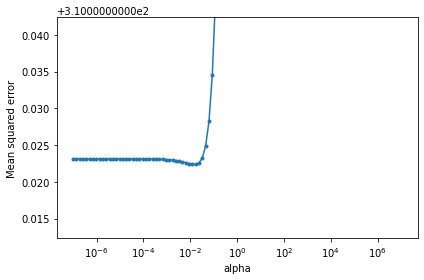

In [32]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

In [33]:
print('dimension-observation-ratio (p/n) for X_train: ')
print(X_train.shape[1]/X_train.shape[0])

dimension-observation-ratio (p/n) for X_train: 
0.405


In [34]:
print('dimension-observation-ratio (p/n) for X_train_full: ')
print(round(X_train_full.shape[1]/X_train_full.shape[0], 3))

dimension-observation-ratio (p/n) for X_train_full: 
0.004


YOUR ANSWER HERE

What we want to achieve ultimately is finding the right model flexibility for a given dataset. If the ratio of number of features to number of observations is high (.4 if X_train is used), then the model is somewhat underdeterminated. If the ratio exceeds 1 there is no unique solution anymore. Choosing a less flexible model by putting a rather high penalty (alpha >10²) leads to better estimates by lowering coefficient variance.

In the case of using X_train_full, the p/n-ration is at .004. In this case least squares has proper flexibility, no additional penalty is needed and coefficients are well estimable with low estimate variance resulting. 

From these theoretical consideration we may expect a CV curve as the one observed. Low penalty yields the correct model flexibility, resulting in low MSE. At a penalty value of alpha = 10⁽⁻²⁾ the ridge regression model becomes too unflexible, resulting in highly biased estimates and skyrocketing MSE.